In [1]:
%matplotlib widget

from DatasetTester import *
import matplotlib.pyplot as plt
import numpy as np

from Emotrics_GetLandmarks_old import GetLandmarks 
from landmark_utils import *

from ProcessResults import *
from LandmarkTester import LandmarkTester as LandmarkTester_old
from LandmarkTester_alt import LandmarkTester

In [19]:
dataset = DatasetTester("./NeuroFace_Open_Access_Data/ALS/")
patient_id = "A009"
task = "NSM_OPEN"
model_to_use = "MEE"

Patient N001 loading...
Patient N002 loading...
Patient N003 loading...
Patient N004 loading...
Patient N007 loading...
Patient N008 loading...
Patient N010 loading...
Patient N011 loading...
Patient N012 loading...
Patient N017 loading...
Patient N019 loading...


In [3]:
dataset._patients[patient_id].keys()

dict_keys(['BBP_NORMAL', 'DDK_PATAKA', 'DDK_PA', 'NSM_BLOW', 'NSM_KISS', 'NSM_OPEN', 'NSM_SPREAD'])

In [4]:
dataset._patients[patient_id][task].keys()

dict_keys([2, 22, 45, 130, 155, 185, 291, 317, 355, 431, 464, 496, 570])

In [5]:
frame = np.random.choice(list(dataset._patients[patient_id][task].keys()))
#frame = 803
frame

130

In [6]:
dataset._patients[patient_id][task][frame].keys()

dict_keys(['landmarks_gt', 'bbox', 'image', 'landmarks_pred'])

In [7]:
#test._patients[patient_id][task][frame]

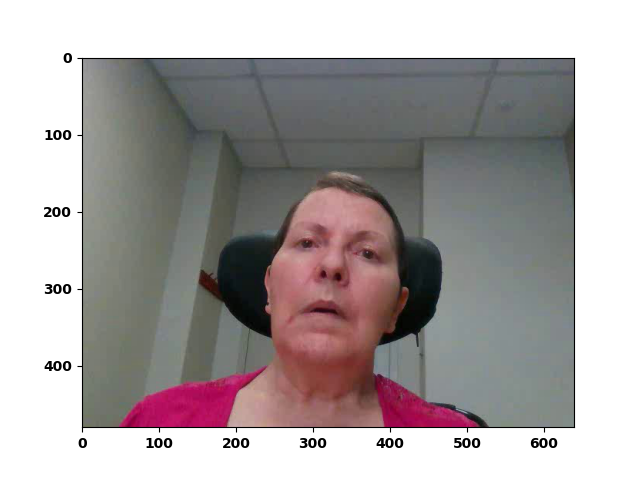

In [8]:
im = dataset._patients[patient_id][task][frame]['image']
plt.figure()
plt.imshow(np.flip(im,axis=-1))
plt.show()

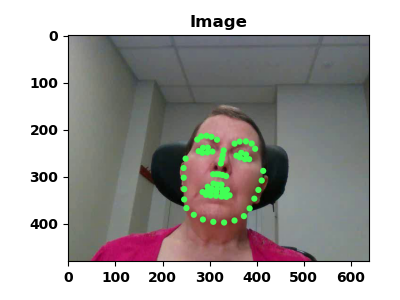

In [9]:
lm_gt = dataset._patients[patient_id][task][frame]['landmarks_gt']
bbox_gt = dataset._patients[patient_id][task][frame]['bbox']

vis_landmarks(np.flip(im,axis=-1), lm_gt)

In [10]:
pr2 = ProcessResults(lm_gt, 'lms_only')
#pr.scale_by_bbox(bbox_gt)
pr2._scaled_by_proportion
pr2._features

{'f0': -0.22705671683855136,
 'f1': 0.8784013352179413,
 'f2': -2.880166419961637,
 'f3': 1.0002983,
 'f4': 0.003962908,
 'f5': 0.015332197,
 'f6': 0.050310772,
 'f7': 0.06311701116815127,
 'f8': 1.0016772,
 'f9': 1.3474585,
 'f10': 1.0486381,
 'f11': 1.0252187,
 'f12': 1.0815588,
 'f13': 1.0312134,
 'f14': 2.0072455206208115,
 'f15': 1.0345669,
 'f16': 1.4305656,
 'f17': 1.7224454,
 'f18': 0.17537352,
 'f19': 0.43022,
 'f20': 0.44931763,
 'f21': 1.6006617162832717,
 'f22': 0.8784322414957021,
 'f23': 0.7621975888800847,
 'f24': 1.0220617,
 'f25': 0.79786456,
 'f26': 0.7551987,
 'f27': 0.33319417,
 'f28': 0.13466376}

In [11]:
test_old = LandmarkTester_old(im, model_to_use)

===== Landmark Tester Initialized =====
Time used : 0.82 sec
Using model : MEE
Original landmarks has 68 points
((480, 640, 3), dtype('uint8'), 0, 215)
((68, 2), dtype('int16'), 213, 413)


In [12]:
test = LandmarkTester(im, model_to_use)

Pupil cannot be detected -- Eye is closed
===== Landmark Tester Initialized =====
Time used : 0.60 sec
Using model : MEE
Original landmarks has 68 points
((480, 640, 3), dtype('uint8'), 0, 215)
((68, 2), dtype('int16'), 213, 412)


In [13]:
%%time
test.test_combined(rand_angle=10, scale=15, num_test=50, rand_mode='normal')

Testing 50 rotations & noises...
First 10 param pairs:
[[5.189086198134608
  array([[[  0.505 ,  -6.13  ,  28.84  ],
          [-18.8   , -14.84  ,   3.99  ],
          [  0.9814,  28.23  , -17.1   ],
          ...,
          [ 12.695 ,   8.58  ,  -5.723 ],
          [ -2.85  ,  -0.285 ,  16.48  ],
          [-21.6   ,  -4.242 ,  -7.24  ]],

         [[ -7.78  ,  27.61  , -19.17  ],
          [  8.48  ,  -1.444 , -13.69  ],
          [  8.02  ,  -4.184 ,   6.285 ],
          ...,
          [  1.852 ,  11.08  ,   6.605 ],
          [ 24.7   ,  -2.854 ,   7.215 ],
          [ -5.406 ,  -9.79  ,  -5.996 ]],

         [[-12.234 ,  15.336 ,  -1.941 ],
          [ 13.58  ,   4.3   ,  -8.914 ],
          [-29.48  ,  17.83  ,  18.3   ],
          ...,
          [ 32.2   , -29.3   , -13.54  ],
          [-35.44  ,  16.52  , -10.06  ],
          [ -1.876 ,   1.777 ,  11.01  ]],

         ...,

         [[-15.125 , -12.11  ,  -2.105 ],
          [ -1.881 , -24.16  ,  24.47  ],
          [ -4.88  

In [14]:
points = test._xy_dist
which_points = np.arange(points.shape[0])

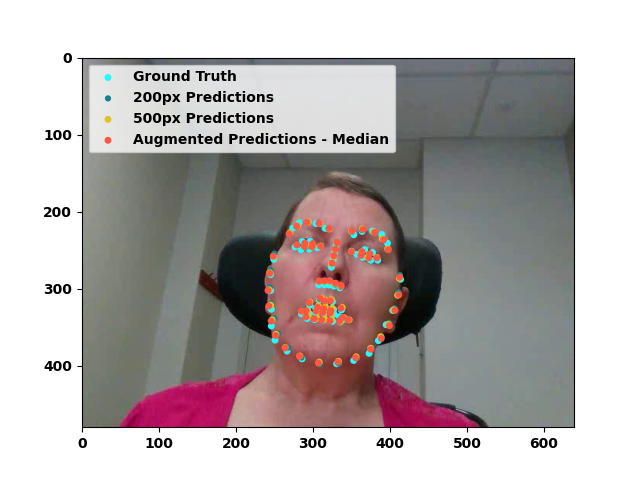

In [15]:
plt.figure()

implot = plt.imshow(np.flip(im,axis=-1))
ax = plt.gca()

# LM GT
gt_points = np.transpose(lm_gt)
plt.scatter(x=gt_points[0], y=gt_points[1], c='#25f9ff', s=25, alpha=1, edgecolor='none')


# Bad lms
bad_points = np.transpose(test_old._og_landmarks)
plt.scatter(x=bad_points[0], y=bad_points[1], c='#128290', s=20, alpha=1, edgecolor='none')


# OG points
og_points = np.transpose(test._og_landmarks)
plt.scatter(x=og_points[0], y=og_points[1], c='#e0c126', s=25, alpha=1, edgecolor='none')

# Median points
#plt.scatter(x=np.median(points, axis=2)[...,0], y=np.median(points, axis=2)[...,1], c='#ff5742', s=25, alpha=1, edgecolor='none')
med_points = np.transpose(test._median_landmarks)
plt.scatter(x=med_points[0], y=med_points[1], c='#ff5742', s=25, alpha=1, edgecolor='none')



# Mean points
'''
for i in which_points:
    plt.scatter(x=np.mean(points[i,0]), y=np.mean(points[i,1]), c='#fa0fdb', s=20, alpha=1, edgecolor='none')
'''

"""
# Test points
for i in which_points:
    #plt.scatter(x=points[i,0], y=points[i,1], c=params, cmap='bwr', s=10, alpha=1, edgecolor='none')
    plt.scatter(x=points[i,0], y=points[i,1], c='blue',s=10, alpha=0.25, edgecolor='none')
"""

# Labels
#ax.legend(loc='upper left',labels=['Augmented Predictions'])
ax.legend(loc='upper left',labels=['Ground Truth','200px Predictions','500px Predictions', 'Augmented Predictions - Median'])


plt.show()


In [16]:
RMSE(lm_gt, test_old._og_landmarks)

3.5569673

In [17]:
RMSE(lm_gt, test._og_landmarks)

3.2029042

In [18]:
RMSE(lm_gt, test._median_landmarks)

3.0949101

In [20]:
pr = ProcessResults(lm_gt, 'lms_only')

In [22]:
pr._features

{'f0': -0.22705671683855136,
 'f1': 0.8784013352179413,
 'f2': -2.880166419961637,
 'f3': 1.0002983,
 'f4': 0.003962908,
 'f5': 0.015332197,
 'f6': 0.050310772,
 'f7': 0.06311701116815127,
 'f8': 1.0016772,
 'f9': 1.3474585,
 'f10': 1.0486381,
 'f11': 1.0252187,
 'f12': 1.0815588,
 'f13': 1.0312134,
 'f14': 2.0072455206208115,
 'f15': 1.0345669,
 'f16': 1.4305656,
 'f17': 1.7224454,
 'f18': 0.17537352,
 'f19': 0.43022,
 'f20': 0.44931763,
 'f21': 1.6006617162832717,
 'f22': 0.8784322414957021,
 'f23': 0.7621975888800847,
 'f24': 1.0220617,
 'f25': 0.79786456,
 'f26': 0.7551987,
 'f27': 0.33319417,
 'f28': 0.13466376}

In [ ]:
f, ax = plt.subplots(6,5, figsize=(4,3), sharex = True, sharey = True)
for i in range(len(ax)):
    for j in range(len(ax[i])):
        idx = i*5+j
        #ax.set_title("Healthy Distribution vs. Patient Feature - f23")
        ax[i,j].hist(fixed_df['f23'], bins=18)
        ax[i,j].axvline(x=-3.8523, color='r', linewidth=2)
        pat_feature_val = 
        percentile = np.percentile(fixed_df['f23'], 5)
        ax[i,j].legend(loc='upper right',labels=['Lower 5th Percentile', 'Patient f23'])

        plt.xlabel("f23")
        plt.ylabel("Observations")
        ax.grid()
        ax.set_xticks(bins)#

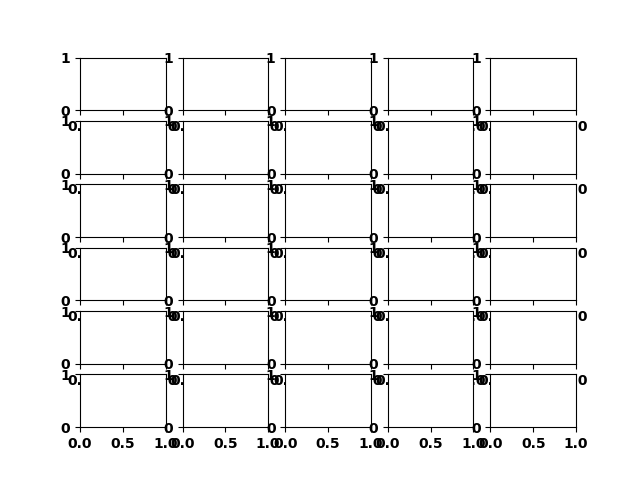

In [24]:
fig, axs = plt.subplots(6, 5)
def vis_triple(I, J, K, figsize = (8,3), shared = True, 
               first_title = 'Original', second_title = 'New',
               third_title = 'Newer',
               show_ticks = True, **kwargs):
    '''
    vis_pair(I, J, figsize = (8,3), shared = True, first_title = 'Original', second_title = 'New'):
    produce a plot of images I and J together. By default takes care of sharing axes to provide
    a little 1x2 plot without all the coding.
    '''
    f, ax = plt.subplots(6,5, figsize=(4,3), sharex = True, sharey = True)
    for a in ax:
        a.plt.hist(fixed_df['f23'])
        a.title("Healthy Distribution vs. Patient Feature - f23")
        a.axvline(x=-3.8523, color='r', linewidth=2)
        a.legend(loc='upper right',labels=['Lower 5th Percentile', 'Patient f23'])
        a.xlabel("f23")
        a.ylabel("Frequency")
        a.grid()


                
    #ax[0].imshow(I, **kwargs)
    #ax[0].set_title(first_title)
    #ax[1].imshow(J, **kwargs)
    #ax[1].set_title(second_title)
    #ax[2].imshow(K, **kwargs)
    #ax[2].set_title(third_title)
    

    plt.tight_layout()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

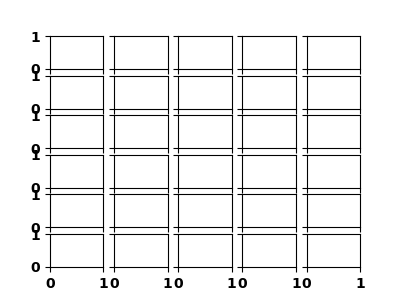

In [27]:
f, ax = plt.subplots(6,5, figsize=(4,3), sharex = True, sharey = True)
for i in range(len(ax)):
    ax[i].hist(fixed_df['f23'])
    ax[i].title("Healthy Distribution vs. Patient Feature - f23")
    ax[i].axvline(x=-3.8523, color='r', linewidth=2)
    ax[i].legend(loc='upper right',labels=['Lower 5th Percentile', 'Patient f23'])
    ax[i].xlabel("f23")
    ax[i].ylabel("Frequency")
    ax[i].grid()


            
#ax[0].imshow(I, **kwargs)
#ax[0].set_title(first_title)
#ax[1].imshow(J, **kwargs)
#ax[1].set_title(second_title)
#ax[2].imshow(K, **kwargs)
#ax[2].set_title(third_title)


plt.tight_layout()